<a href="https://colab.research.google.com/github/obeabi/Stocks_TSA/blob/main/YahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 110 kB 9.6 MB/s 
     |████████████████████████████████| 128 kB 58.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 112 kB 54.9 MB/s 
     |████████████████████████████████| 4.0 MB 41.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
# Install libraries
import pandas as pd
import numpy as np



import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact, ttest_ind
from scipy.stats.mstats import ks_twosamp
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("libraries installed succesfully!")

libraries installed succesfully!


In [3]:
import yfinance as yahooFinance
 
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
GetStockInformation = yahooFinance.Ticker("VUN.TO")
print(type(GetStockInformation.info))
 
# whole python dictionary is printed here
print(GetStockInformation.info)

<class 'dict'>
{'exchange': 'TOR', 'shortName': 'VANGUARD US TOTAL MARKET IDX ET', 'longName': 'Vanguard U.S. Total Market Index ETF', 'exchangeTimezoneName': 'America/Toronto', 'exchangeTimezoneShortName': 'EST', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-18000000', 'quoteType': 'ETF', 'symbol': 'VUN.TO', 'messageBoardId': 'finmb_242582003', 'market': 'ca_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': None, 'beta3Year': 1.02, 'profitMargins': None, 'enterpriseToEbitda': None, '52WeekChange': None, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'fundInceptionDate': 1375401600, 'annualReportExpenseRatio': None, 'totalAssets': 5595947008, 'bookValue': None, 'fundFamily': 'Vanguard Investments Canada Inc', 'lastFiscalYearEnd': None, 'netIncomeToCommon': None, 'trailingEps': None, 'lastDividendValue': None, 'SandP52WeekChange': None, 'priceToBook': None, 'nextFiscalYearEnd': None, 'yield': 0.011, 'mostRecentQuarter': None, 'ente

## Retrieve financial key metrics like Company Sector, Price Earnings Ratio, and Company Beta from the above dictionary of items easily.

In [4]:
# display Company Sector/Exchange
#print("Company Sector : ", GetStockInformation.info['sector'])
print("Stock Exchange : ", GetStockInformation.info['exchange'])
print("\nStock Symbol/Ticker : ", GetStockInformation.info['symbol'])
print("\nFull Name of Stock/Etf  :", GetStockInformation.info['longName'])
print("\nQuote Type Stock or Etf?  :", GetStockInformation.info['quoteType'])
print("\nNav Price of Stock or Etf?  :", GetStockInformation.info['navPrice'])

# display Sector Weightings
print()
print("Sector Weightings :")
print(GetStockInformation.info['sectorWeightings'])
 
# display Price Earnings Ratio
#print("Price Earnings Ratio : ", GetStockInformation.info['trailingPE'])
print("\nAverage 10 Day Volume of Stock or Etf?  :", GetStockInformation.info['averageDailyVolume10Day'])
 
# display Company Beta
#print(" Company Beta : ", GetStockInformation.info['beta'])

Stock Exchange :  TOR

Stock Symbol/Ticker :  VUN.TO

Full Name of Stock/Etf  : Vanguard U.S. Total Market Index ETF

Quote Type Stock or Etf?  : ETF

Nav Price of Stock or Etf?  : 71

Sector Weightings :
[{'realestate': 0.0342}, {'consumer_cyclical': 0.10560001}, {'basic_materials': 0.0248}, {'consumer_defensive': 0.0669}, {'technology': 0.2284}, {'communication_services': 0.0673}, {'financial_services': 0.1366}, {'utilities': 0.0241}, {'industrials': 0.0954}, {'energy': 0.052600004}, {'healthcare': 0.15020001}]

Average 10 Day Volume of Stock or Etf?  : 55580


In [5]:
# get all key value pairs that are available
for key, value in GetStockInformation.info.items():
    print(key, ":", value)

exchange : TOR
shortName : VANGUARD US TOTAL MARKET IDX ET
longName : Vanguard U.S. Total Market Index ETF
exchangeTimezoneName : America/Toronto
exchangeTimezoneShortName : EST
isEsgPopulated : False
gmtOffSetMilliseconds : -18000000
quoteType : ETF
symbol : VUN.TO
messageBoardId : finmb_242582003
market : ca_market
annualHoldingsTurnover : None
enterpriseToRevenue : None
beta3Year : 1.02
profitMargins : None
enterpriseToEbitda : None
52WeekChange : None
morningStarRiskRating : None
forwardEps : None
revenueQuarterlyGrowth : None
fundInceptionDate : 1375401600
annualReportExpenseRatio : None
totalAssets : 5595947008
bookValue : None
fundFamily : Vanguard Investments Canada Inc
lastFiscalYearEnd : None
netIncomeToCommon : None
trailingEps : None
lastDividendValue : None
SandP52WeekChange : None
priceToBook : None
nextFiscalYearEnd : None
yield : 0.011
mostRecentQuarter : None
enterpriseValue : None
priceHint : 2
threeYearAverageReturn : 0.078200005
lastSplitDate : None
lastSplitFactor 

## Retrieve historical market prices too and display them.

In [29]:
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
df = GetStockInformation.history(period="ytd")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-01-04 00:00:00-05:00,83.317990,83.556039,82.683186,83.109695,59900,0.0,0.0,0.0
2022-01-05 00:00:00-05:00,82.921238,83.050188,81.631798,81.631798,88100,0.0,0.0,0.0
2022-01-06 00:00:00-05:00,81.810320,81.810320,81.185431,81.274704,69200,0.0,0.0,0.0
2022-01-07 00:00:00-05:00,81.274713,81.403654,80.382018,80.411774,43400,0.0,0.0,0.0
2022-01-10 00:00:00-05:00,80.342332,80.530792,78.973540,80.530792,94700,0.0,0.0,0.0


In [30]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')

In [31]:
# Focusing on close prIce only
df1 = df['Close'].to_frame()#
df2 = df[['Open','Close']]
df2.head()

,Open,Close
Date,,
2022-01-04 00:00:00-05:00,83.317990,83.109695
2022-01-05 00:00:00-05:00,82.921238,81.631798
2022-01-06 00:00:00-05:00,81.810320,81.274704
2022-01-07 00:00:00-05:00,81.274713,80.411774
2022-01-10 00:00:00-05:00,80.342332,80.530792


In [32]:
# Calculate the 50 day moving average of close price
df1['SMA50'] = df1['Close'].rolling(50).mean()


# Calculate the 100 day moving average of close price
df1['SMA100'] = df1['Close'].rolling(100).mean()


# Calculate the 150 day moving average of close price
df1['SMA150'] = df1['Close'].rolling(150).mean()

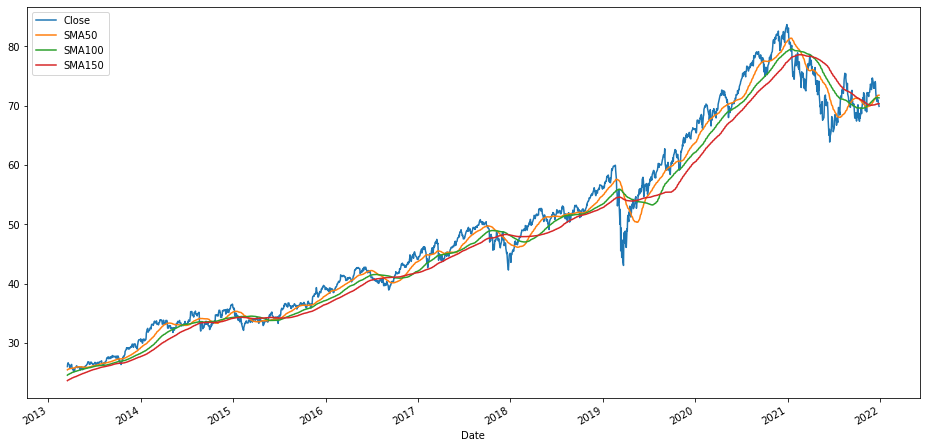

In [13]:

# removing all the NULL values using dropna() method
df1.dropna(inplace=True)
 
# plotting Close price and simple
# moving average of 30 days using .plot() method
df1[['Close', 'SMA50', 'SMA100', 'SMA150']].plot(label='VDY.TO')
plt.show()

In [33]:
# Calculate average daily return ofstock in basis point units
df2['daily_return'] = 100*((df2['Close'] - df2['Open'])/ df2['Open'])
df2.head()

<ipython-input-33-45c937e2def4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['daily_return'] = 100*((df2['Close'] - df2['Open'])/ df2['Open'])


,Open,Close,daily_return
Date,,,
2022-01-04 00:00:00-05:00,83.317990,83.109695,-0.249999
2022-01-05 00:00:00-05:00,82.921238,81.631798,-1.555018
2022-01-06 00:00:00-05:00,81.810320,81.274704,-0.654705
2022-01-07 00:00:00-05:00,81.274713,80.411774,-1.061756
2022-01-10 00:00:00-05:00,80.342332,80.530792,0.234571


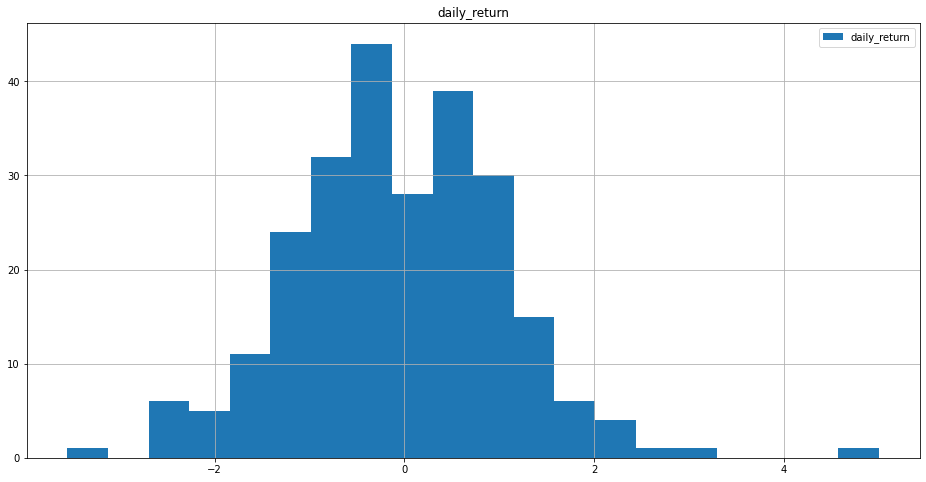

In [36]:
df2.hist(column = 'daily_return', bins = 20, legend = True)
plt.show()

In [37]:
print(df2['daily_return'].mean())
print(df2['daily_return'].std(skipna = True, ddof = 1))

-0.058879581907699874
1.0900292999841827


## ARIMA Method for TSA

In [ ]:
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [ ]:
# Focusing on close prIce only
df1 = df['Close'].to_frame()
df1.head()

,Close
Date,
2013-08-12 00:00:00-04:00,21.673931
2013-08-13 00:00:00-04:00,21.824017
2013-08-14 00:00:00-04:00,21.691587
2013-08-15 00:00:00-04:00,21.311966
2013-08-16 00:00:00-04:00,21.311966


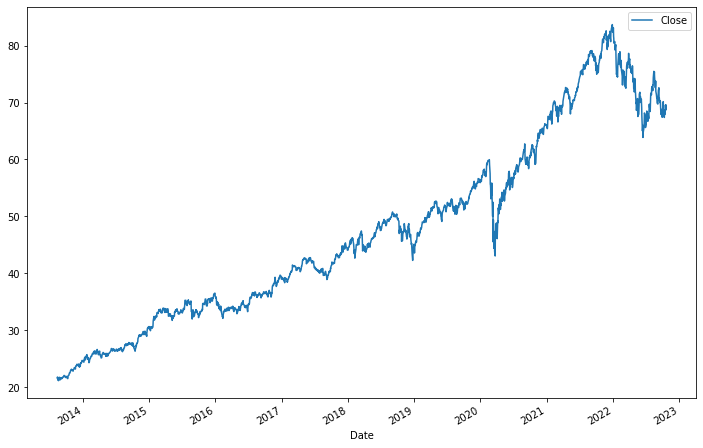

In [ ]:
# show plots in the notebook
%matplotlib inline
df1.plot(figsize=(12,8));

In [ ]:
# Test for serial correlation is the Durbin-Watson statistic. 
sm.stats.durbin_watson(df1)

array([0.00011655])

###  This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.


#### Partial autocorrelations. 
Another useful method to examine serial dependencies is to examine the partial autocorrelation function (PACF) – an extension of autocorrelation, where the dependence on the intermediate elements (those within the lag) is removed.

Once we determine the nature of the auto-correlations we use the following rules of thumb.

   * Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter
   * Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters
   * Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter.
   * Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.
   * Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.

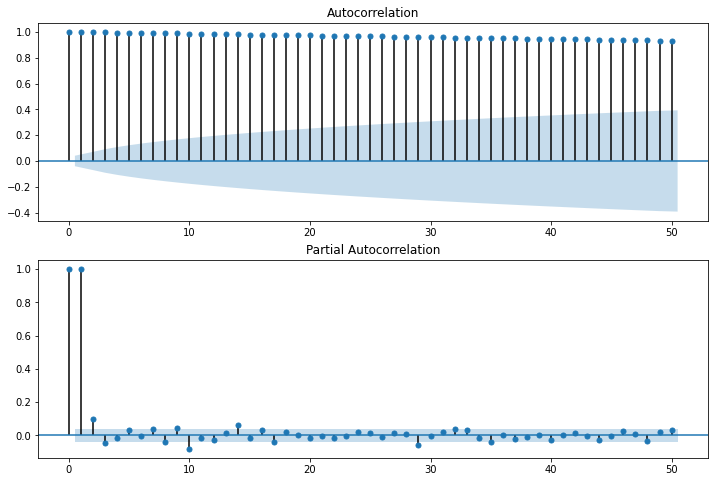

In [ ]:
# Can we get p and q ?
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1, lags=50, ax=ax2)

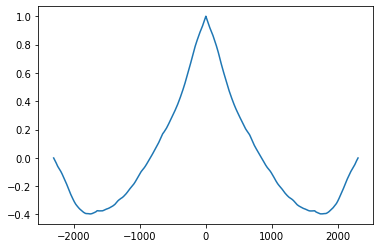

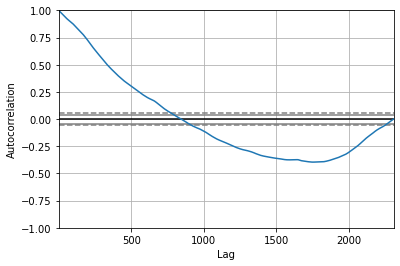

In [ ]:
from pandas.plotting import autocorrelation_plot
df1['Close_2'] = df1['Close']
df1['Close_2'] = (df1['Close_2'] - df1['Close_2'].mean()) / (df1['Close_2'].std())
plt.acorr(df1['Close_2'],maxlags = len(df1['Close_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(df1['Close'])
plt.show()